# 5강. 인공지능과 가위바위보 하기

## 손글씨 분류하기

## Step 1. 데이터 준비하기

### MNIST 숫자 손글씨 Dataset 불러들이기

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__) # tensorflow 버전

mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# mnist 데이터 로드 (다운로드까지 자동으로 진행)

print(len(x_train))

2.6.0
11501568/11490434 [==============================] - 0s 0us/step
60000


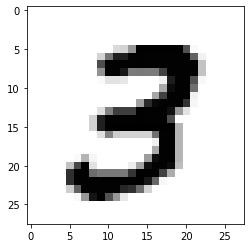

In [4]:
# 숫자 손글씨 이미지 하나 출력해보기
plt.imshow(x_train[7], cmap=plt.cm.binary)
plt.show()

X항목(x_train, x_test)은 이미지 데이터를 담은 행렬.  
x_train[0] = 첫 번째 이미지 / x_train[1] = 두 번째 이미지

In [5]:
print(y_train[7])

3


Y항목(y_train, y_test)에는 X항목에 들어있는 이미지에 대응하는 실제 숫자 값이 담겨 있다.

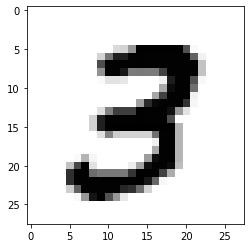

8 번째 이미지의 숫자는 바로 3 입니다.


In [7]:
index=7 # 0~59999사이 숫자 지정 가능
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print((index+1), '번째 이미지의 숫자는 바로', y_train[index], '입니다.')

In [8]:
print(x_train.shape) # 28x28 크기의 숫자 이미지가 60000장

(60000, 28, 28)


In [9]:
print(x_test.shape)# 28x28 크기의 숫자 이미지가 10000장

(10000, 28, 28)


[학습용, 검증용, 시험용 데이터](https://ganghee-lee.tistory.com/38)
1. Train set(학습용 데이터) : 학습하는데 유일하게 사용  
2. Validation set(검증용 데이터) : 학습이 완료된 모델을 검증 (머신러닝 학습 과정이 정상적으로 진행되고 있는지, 오버피팅이 일어나지 않는지, 학습을 중단해도 괜찮은지 등)  
3. Test set(시험용 데이터) : 학습과 검증이 완료된 모델에 대한 성능 평가  

### 데이터 전처리 하기

In [10]:
print('최소값:',np.min(x_train), '최대값:',np.max(x_train))
# 숫자 손글씨 이미지의 실제 픽셀 값은 0~255사이

최소값: 0 최대값: 255


In [ ]:
# 입력을 0~1 사이의 값으로 정규화 시켜주기(픽셀 값이 0~255사이에 있으므로 255.0으로 나누어주기)
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), '최대값:',np.max(x_train_norm))

## Step 2. 딥러닝 네트워크 설계하기

### Sequential Model
Sequential API : 개발의 자유도는 많이 떨어지지만 매우 간단하게 딥러닝 모델을 만들어낼 수 있는 방법

In [14]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


- Conv2D(숫자) : 사용하는 이미지 특징의 수(입력 이미지가 다양할수록 더 많은 특징을 고려)  
- input_shape : 입력이미지의 형태  
- Dense(숫자) : 분류기에 사용되는 뉴런의 숫자 -> 복잡한 문제일수록 수를 늘리기 / 최종 분류기의 class 수  
- [(3,3)](https://blog.joonas.io/196?category=1016329) : 픽셀을 어떻게 뭉쳐서 볼 것인지 결정하는 윈도우(필터, 커널)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

## Step 3. 딥러닝 네트워크 학습시키기

In [16]:
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")

x_train_reshaped = x_train_norm.reshape(-1, 28, 28, 1) # 데이터개수에 -1을 쓰면 reshape시 자동계산
x_test_reshaped = x_test_norm.reshape(-1, 28, 28, 1)

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


네트워크 입력 = (데이터개수, 이미지크기 x, 이미지크기 y, 채널수)  
채널수 1 = 흑백 이미지 / 채널수 3 = 컬러 이미지(RGB)

In [18]:
# x_train 학습 데이터로 딥러닝 네트워크 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10) # 60000개의 데이터를 10번 반복 사용해서 학습

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0268 - accuracy: 0.9914
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0213 - accuracy: 0.9930
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0180 - accuracy: 0.9943
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0154 - accuracy: 0.9948
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0122 - accuracy: 0.9962
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0111 - accuracy: 0.9962
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0109 - accuracy: 0.9965
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0087 - accuracy: 0.9972
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0086 - accuracy: 0.9971
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.008

epoch 별로 인식 정확도가 달라진다. epoch=8부터 정확도에 큰 차이가 없다. (학습할 때마다 인식 정확도는 변동)

## Step 4. 성능 확인하기

### 테스트 데이터로 성능 확인

In [19]:
# 모델 시험하기
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

313/313 - 1s - loss: 0.0364 - accuracy: 0.9906
test_loss: 0.03644309192895889
test_accuracy: 0.9905999898910522


x_test 시험용 데이터로 했을 때 accuracy가 99.06점으로 99.71점에 비해 떨어졌다. 학습용 데이터와 시험용 데이터의 손글씨 주인이 달라 한 번도 보지 못한 필체의 손글씨가 있을 가능성이 높아졌기 때문이다.

### 잘못 추론한 데이터 눈으로 확인하기

In [20]:
# 확률값이 가장 높은 숫자 확인
predicted_result = model.predict(x_test_reshaped) # 모델이 추론한 확률값
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0 # 1번째 x_test보기
print('model.predict() 결과 :', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 :', predicted_labels[idx])
print('실제 데이터의 라벨 :', y_test[idx])

model.predict() 결과 : [4.1945680e-11 3.9803917e-11 4.0656505e-09 3.8927049e-11 9.2314427e-13
 3.0788572e-13 5.7079383e-18 1.0000000e+00 1.6776158e-12 3.0879941e-11]
model이 추론한 가장 가능성이 높은 결과 : 7
실제 데이터의 라벨 : 7


model.predict() : model이 입력값을 보고 실제로 추론한 확률분포를 출력  
-> 7일 확률 : 1.0000000e+00(1.00에 근접)

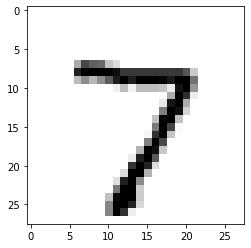

In [21]:
# 입력한 이미지가 7이 맞는지 확인
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [1.4236015e-10 4.0869004e-08 6.5701532e-01 3.4280485e-01 1.1308026e-09
 4.7085025e-05 2.7664377e-12 2.8017492e-05 3.1354324e-05 7.3284442e-05]
라벨: 3, 예측결과: 2


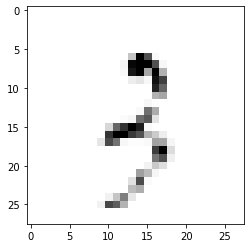

예측확률분포: [1.1492249e-08 7.8024409e-10 8.4716433e-08 9.4405689e-19 9.6968836e-01
 2.2227763e-13 3.0311532e-02 3.4245698e-16 1.0616237e-11 2.8490116e-12]
라벨: 6, 예측결과: 4


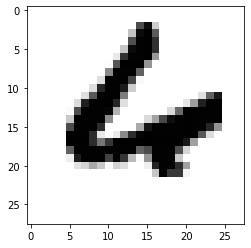

예측확률분포: [2.81271415e-08 1.31387096e-10 1.12136866e-09 2.27737638e-11
 6.33281982e-03 1.02940705e-08 1.33847459e-06 1.82545339e-08
 9.93656456e-01 9.34914442e-06]
라벨: 4, 예측결과: 8


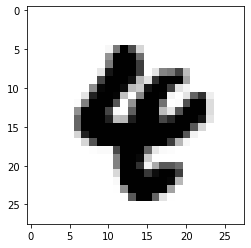

예측확률분포: [7.2596872e-01 4.8347299e-09 9.0991074e-05 4.5371571e-04 1.9190159e-08
 2.2249797e-01 4.7032665e-02 2.1470336e-11 2.3551685e-04 3.7204155e-03]
라벨: 5, 예측결과: 0


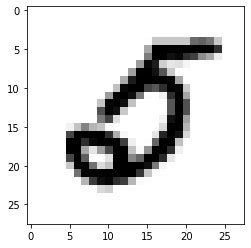

예측확률분포: [4.2087969e-09 1.6010386e-09 3.1100221e-08 2.2875786e-07 4.9617659e-02
 2.0569275e-09 4.5511759e-09 6.3274985e-09 7.4055509e-07 9.5038128e-01]
라벨: 4, 예측결과: 9


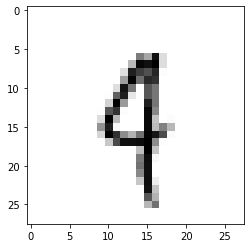

In [24]:
# 모델이 추론한 숫자와 실제 라벨 값이 다른 경우
import random
wrong_predict_list=[]

for i, _ in enumerate(predicted_labels):
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)
    # i번째 test_labels과 y_test가 다른 경우
    
# wrong_predict_list에서 랜덤으로 5개 뽑기
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## Step 5. 더 좋은 네트워크 만들어 보기
하이퍼파라미터 바꿔 인식률 높이기 : Conv2D 입력 이미지의 특징 수 늘리거나 줄여보기 / Dense 뉴런 수 바꿔보기 / epoch 학습 반복 횟수 바꿔보기

In [29]:
# 하이퍼파라미터 바꾸기
n_channel_1=32
n_channel_2=64
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=n_train_epoch) # 모델 훈련

test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2) # 모델 시험
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                51232     
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

- n_channel_1=16 / n_channel_2=32 / n_dense=32 / n_train_epoch=10 : accuracy = 98.70점  
- n_channel_1=16 / n_channel_2=16 / n_dense=32 / n_train_epoch=10 : accuracy = 98.84점
- n_channel_1=16 / n_channel_2=16 / n_dense=16 / n_train_epoch=9 : accuracy = 98.74점
- n_channel_1=32 / n_channel_2=32 / n_dense=32 / n_train_epoch=10 : accuracy = 98.94점
- n_channel_1=32 / n_channel_2=64 / n_dense=32 / n_train_epoch=10 : accuracy = 98.83점